In [4]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

In [5]:
# def f(x): #Här skapar vi en testfunktion 
#     return x**2

# def los(x,alpha,beta,L): #Här definierar vi den exakta lösningen till ovanstående testfunktion
#     return (x**4)/12 + (beta - alpha - (L**4)/12)*x/L + alpha

def los(x, alpha, beta, L):
    return np.log(x +1) + (beta - alpha - np.log(L+1))*x/L + alpha

def f(x):
    return -1/((x+1)**2)


In [6]:
def twopBVP(fvec, alpha, beta, L, N):
    deltaX = L/(N+1)
    T = np.eye(len(fvec))*-2 
    for i in range(len(fvec)-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
        T[i+1,i] = 1
        T[i, i+1] = 1
        
    return (deltaX**2)*np.linalg.inv(T)@fvec #Detta löser ekvationen och spottar ut en vektor innehållande y(i). 

def solve(f,alpha, beta, L, N): #Tanken är att denna ska generera högerledet som man sedan stoppar in i twopBVP för att lösa. 
    deltaX = L/(N+1)
    fvec = np.zeros(((N-1), 1)) ##fvec är två element kortare än grid för den innehåller bara de inre punkterna
    grid = np.linspace(0,L,N+1)

    fvec[0] = -alpha/(deltaX**2) + f(grid[1]) #Första och sista elementet i fvec fixar vi manuellt. 
    fvec[-1] = -beta/(deltaX**2) + f(grid[-2])

    for i in range(1, N-2):  #Fyller fvec med funktionsvärdena F(x1) till F(xN-1)
        fvec[i] = f(grid[i])

    ans = np.zeros(((N+1), 1))
    ans[0] = alpha
    ans[1:N] = twopBVP(fvec, alpha, beta,  L, N)
    ans[-1] = beta

    return ans, grid #Spottar ut grid för att plotta sen 

    


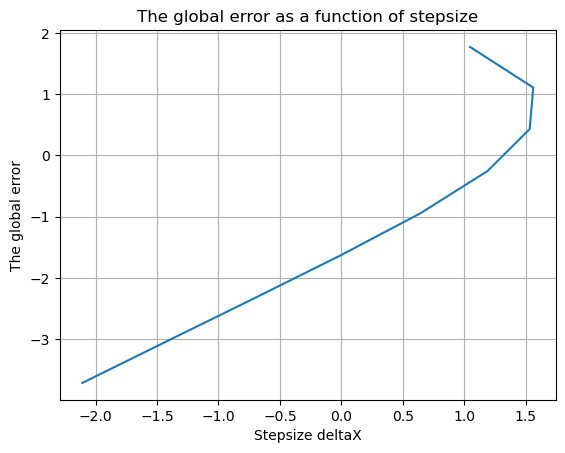

In [10]:
def errVSh(f,alpha, beta, L, N):
    Nvec = [int(np.power(2,i)) for i in range(4, 13)]
    err = np.zeros(len(Nvec))

    for i in range(0, len(Nvec)):
        y, x = solve(f, alpha, beta, L, Nvec[i])
        y_an = np.zeros(((Nvec[i]+1), 1))  #Skapar en vektor för den exakta lösningen
        j=0
        for j in range(Nvec[i]+1):
            y_an[j] = los(x[j], alpha, beta, L)  #Fyller vektorn med den exakta lösningen
        err[i] = np.sqrt(L/(Nvec[i]+1)) * la.norm(y-y_an) #Beräknar RMS med norm *(delta x)^2 

    deltaX=np.zeros(len(Nvec))
    for i in range(len(Nvec)):
        deltaX[i] = L / (Nvec[i] +1)
    plt.grid()
    plt.xlabel("Stepsize deltaX")
    plt.ylabel("The global error")
    plt.title("The global error as a function of stepsize")
    #plt.loglog(deltaX, err, 'r')
    return np.log(err), np.log(deltaX)

alpha, beta, L, N = 3, 8, 100, 200

x, y = errVSh(f, alpha, beta, L, N)  #Vi verkar bara få ordo 1? Har vi missuppfattat något? 
plt.plot(x, y)

In [8]:
# alpha, beta, L, N = 3, -5, 50, 200

# deltaX = L/(N+1)
# y, x = solve(f, alpha, beta, L, N)

# y_an = np.zeros(((N+1), 1))
# for i in range(N+1):
#     y_an[i] = los(x[i], alpha, beta, L)

# xlog = np.log(x)
# errlog = np.log(np.abs(y-y_an))


# err = np.sqrt(deltaX) * la.norm(y-y_an)

# plt.loglog(x, err)
# plt.plot(x, y)
# plt.plot(x, y_an)
# plt.plot(x, np.zeros_like(y))
#plt.plot(xlog[0:N], errlog[0:N])

## Task 1.2

The deflection at the midpoint of the steelbeem is equal to [-961.88612] mm


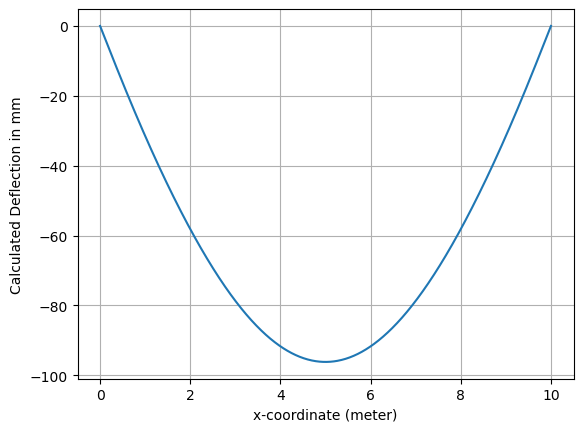

In [51]:
def I(x, L): #Definierar I(x)
    return 10e-3*(3 - 2*np.power((np.cos(np.pi*x/L)), 12.0))  

E = 1.9*np.power(10,11) 
L = 10 
alpha, beta = 0,0
N = 999 
grid = np.linspace(0,L,N+1)

Q = np.zeros(((N-1), 1))
for i in range(len(Q)):
    Q[i] = -50000 #konstant -50 kN/m, eventuellt ska man ta dividerat med L här. 

M = np.zeros(((N-1), 1))
M = twopBVP(Q, alpha, beta,  L, N)

fvec = np.zeros_like(M) #Vektorn som vi använder för att bestämma u. 
for i in range(len(fvec)):
    fvec[i] = M[i]/(E*I(grid[i+1], L))

    
U = np.zeros(((N+1), 1))
U[0] = alpha
U[1:N] = twopBVP(fvec, alpha, beta,  L, N)  
U[-1] = beta

plt.grid()
plt.plot(grid, U*10**3) #Förlänger med 1000 för att det ska ses lite tydligare 
plt.xlabel("x-coordinate (meter)")
plt.ylabel("Calculated Deflection in mm")

print("The deflection at the midpoint of the steelbeem is equal to " + str(10e3 * U[int((N+1)/2)]) + " mm")



